# Notebook 1B: Some additional features, considerations, and links

> **It is probably true to say that whatever you area of interest or research, there will be a Jupyter Notebook out there to get you started.**


## This notebook is provided as a chance to introduce a couple of other python packages that you might find useful:

    - Using APIs to gather data from the web (Requests - 
    - Relationships between things (NetworkX)
    - Faker for generating random *fake* data with certain characteristics 
    - Numpy and SciPy
    - Pandas for dataframes (csv and spreadsheet replacement)
    - Biopython /Bioconda

In [1]:
import faker as fk
import pandas as pd
import numpy as np

In [38]:
# regional specifics for creating fake data
fk.config.AVAILABLE_LOCALES[0:20]

['ar_AA',
 'ar_EG',
 'ar_JO',
 'ar_PS',
 'ar_SA',
 'bg_BG',
 'bs_BA',
 'cs_CZ',
 'da_DK',
 'de',
 'de_AT',
 'de_CH',
 'de_DE',
 'dk_DK',
 'el_CY',
 'el_GR',
 'en',
 'en_AU',
 'en_CA',
 'en_GB']

## let's create a fake data generator (for right here in _Great?_ Britain)

In [3]:
# let's create a fake data generator for here

fake_demo =fk.Faker('en_GB')

In [4]:
# and have a look at some of the options for generating data
fake_demo.first_name_female()

'Hayley'

In [5]:
fake_demo.first_name_male()

'Connor'

### We can also creat a range of other data to test our analysis / model

In [6]:
# country
fake_demo.country()

'Turks and Caicos Islands'

In [7]:
# or geographical co-ordinates
fake_demo.latlng()

(Decimal('-86.506598'), Decimal('14.283361'))

In [8]:
# and maybe a timestamp
fake_demo.iso8601()

'2009-10-10T18:20:33'

## We can use this library and Pandas to create and dataframe of testing data

***
Our fake DataFrame contains a name, country and coordinates (not related to each other), some random numbers, an e-mail address, timestamp, a paragraph of random text, and a 'bs'  (short for business, but then this is all 'bs')
***

In [9]:
def create_fake_row(num=1):
    """Our fake DataFrame contains a name, country and coordinates (not related to each other),
    some random numbers, an e-mail address, timestamp, a paragraph of random text,
    and a 'bs'  (short for business, but then this is all 'bs')"""
    out = [{"name":fake_demo.name(),
            "LatLong":fake_demo.latlng(),
            "Country":fake_demo.country(),  # will not match LatLong
            "email":fake_demo.email(),
            "date_time":fake_demo.iso8601(),
            "paragraph":fake_demo.paragraph(),
            "bs":fake_demo.bs(),
            "randomdata":np.random.randint(1,1000)} for x in range(num)]
    return out

In [10]:
df_fake = pd.DataFrame(create_fake_row(1000))

df_fake.head()

,name,LatLong,Country,email,date_time,paragraph,bs,randomdata
0,Mr. Henry Miller,"(85.993452, -80.521660)",Argentina,fsharpe@hotmail.com,2003-09-27T08:06:23,Quibusdam aperiam eum consequatur quasi dolor....,deploy bricks-and-clicks convergence,927
1,Dr. Maurice Green,"(-77.4862515, -46.083889)",Samoa,clare12@evans-hart.com,2018-03-20T10:53:55,Hic deleniti quo nostrum quia vero hic. Eos al...,leverage ubiquitous channels,954
2,Dr. Yvonne Savage,"(74.708217, -145.596143)",Georgia,shanesanders@hancock.com,1972-08-05T15:29:06,Odit corporis totam ut sequi. Delectus volupta...,iterate integrated initiatives,21
3,Lucy Walker-Arnold,"(-69.2135675, -3.519260)",Qatar,jstevens@palmer.com,1984-03-19T13:30:28,Rem omnis eius sunt voluptatem. Dicta reiciend...,seize 24/365 networks,858
4,Tom Smith,"(44.999621, -61.941992)",Ethiopia,frank41@cook.com,2003-09-13T11:26:56,Quos voluptatibus ipsa sequi totam debitis. Vo...,redefine bricks-and-clicks eyeballs,583


In [11]:
#Split LatLong column up
df_fake =df_fake.join(pd.DataFrame(df_fake.LatLong.values.tolist(), columns=['Lat', 'Long']))

we can split columns into new columns to help useage later if needed

In [12]:
fake_density =df_fake.Country.value_counts()

fake_density

Nepal               10
Comoros             10
Samoa                9
Congo                9
Malawi               9
                    ..
Belarus              1
Marshall Islands     1
Egypt                1
Colombia             1
Guatemala            1
Name: Country, Length: 233, dtype: int64


## Next we are going to import some of the choices we have for exploring geographical data

In [13]:
import geopandas as gpd
import matplotlib
%matplotlib inline

In [14]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [16]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [17]:
fake_demo_mapped = world.join(fake_density, on='name',how='inner')

fake_demo_mapped.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",5
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",5
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5


<AxesSubplot:>

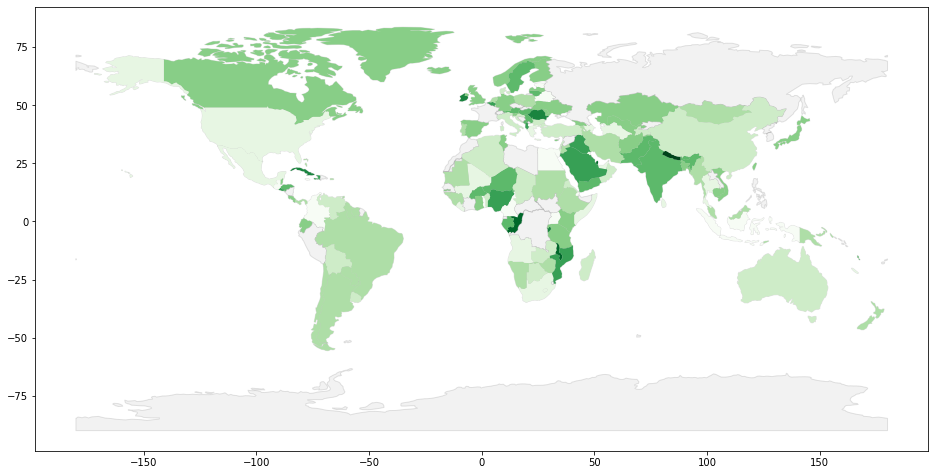

In [18]:
#  A matplotlib option 
base = world.plot(alpha=0.1, color='gray', edgecolor='black', figsize=(16,16))
fake_demo_mapped.plot(column = 'Country',cmap='Greens', legend=False, ax=base)